In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

In [16]:
import sqldf

In [17]:
df = pd.read_csv("D:\\DataAnalysis\\thay_long\\homework-lv2\\shopee-project\\shopee-fraud-project\\transaction_data.csv")

In [18]:
df

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
0,10/30/2019 13:37,10/30/2019,142008725,102161515,1005,100054430,70000,20000
1,10/30/2019 20:26,10/30/2019,142119377,102867263,10050,1792841,80000,20000
2,10/30/2019 12:22,10/30/2019,141986418,100401383,10075,100155720,125000,20000
3,10/30/2019 9:46,10/30/2019,141941958,103213155,10088,103894677,82000,20000
4,10/30/2019 21:56,10/30/2019,142139275,101003290,10142,103909421,260000,20000
...,...,...,...,...,...,...,...,...
4606,11/2/2019 18:22,11/2/2019,142816720,103022399,9949,101915150,450000,20000
4607,11/2/2019 14:09,11/2/2019,142755559,100344658,9957,103201893,80000,20000
4608,11/2/2019 9:54,11/2/2019,142695503,103907242,9967,1892155,250000,20000
4609,11/2/2019 20:48,11/2/2019,142847286,104102998,9967,1892155,1030000,20000


In [19]:
df["txn_date"] = pd.to_datetime(df["txn_date"])
df["txn_time"] = pd.to_datetime(df["txn_time"])

In [20]:
df["order_id"] = df["order_id"].astype(str)
df["uid"] = df["uid"].astype(str)
df["shop_id"] = df["shop_id"].astype(str)
df["shop_owner_uid"] = df["shop_owner_uid"].astype(str)


In [21]:
import matplotlib.pyplot as plt

e:\anaconda-app\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 500000.0)

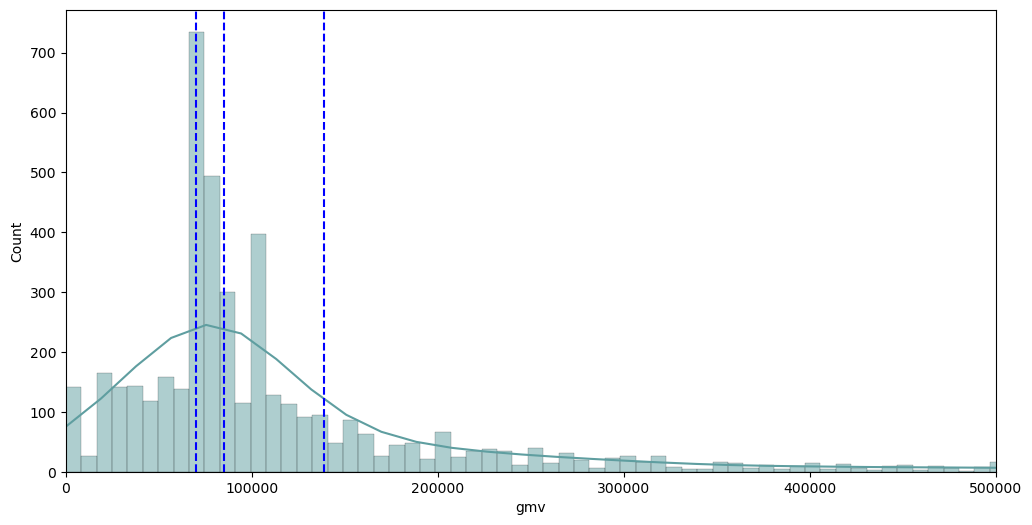

In [22]:
fig,ax = plt.subplots(figsize=(12,6))
ax =sns.histplot(data=df,x=df.gmv,kde=True,color="#5f9ea0")
ax.axvline(np.percentile(df.gmv,25), color="blue",linestyle="--")
ax.axvline(np.percentile(df.gmv,50), color="blue",linestyle="--")
ax.axvline(np.percentile(df.gmv,75), color="blue",linestyle="--")
plt.xlim(0,500000)

In [23]:
ax.yaxis.grid(color="gray",linestyle="dashed")

e:\anaconda-app\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


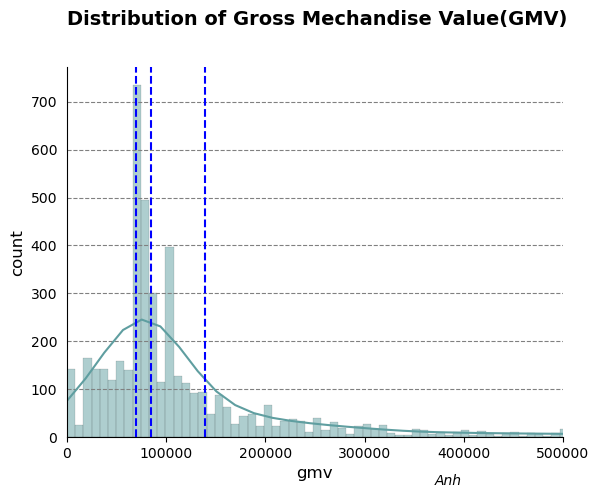

In [24]:
ax =sns.histplot(data=df,x=df.gmv,kde=True,color="#5f9ea0")
ax.axvline(np.percentile(df.gmv,25), color="blue",linestyle="--")
ax.axvline(np.percentile(df.gmv,50), color="blue",linestyle="--")
ax.axvline(np.percentile(df.gmv,75), color="blue",linestyle="--")
plt.xlim(0,500000)

ax.yaxis.grid(color="gray",linestyle="dashed")
#bỏ đường ở trên bên phải
spines = ['top','right']
for s in spines:
    ax.spines[s].set_visible(False)
 #bỏ dấu tick hai trục
ax.tick_params(left=False)
#Thêm title, label
plt.suptitle("Distribution of Gross Mechandise Value(GMV)",fontweight="bold",size=14,horizontalalignment = "left", x=0.125,y=1)
plt.xlabel('gmv',size=12)
plt.ylabel('count',size=12)
plt.text(0.7,0.01,"Anh",style="italic",transform=plt.gcf().transFigure)
plt.show()

In [25]:
df['gmv'].value_counts()

gmv
70000     524
100000    316
80000     209
75000     150
20000     123
         ... 
298000      1
20122       1
67600       1
246000      1
266000      1
Name: count, Length: 572, dtype: int64

In [27]:
df.columns

Index(['txn_time', 'txn_date', 'order_id', 'uid', 'shop_id', 'shop_owner_uid',
       'gmv', 'rebate'],
      dtype='object')

In [36]:
transform = sqldf.run("""select case when gmv >=70000 and gmv < 80000 then '70s' when gmv >=60000 and gmv < 70000 then '60s' when gmv >= 50000 and gmv < 60000 then '50s' else 'other' end as Price_range, COUNT(*) as Transaction_count FROM df GROUP BY Price_range""")
print(transform)

  Price_range  Transaction_count
0         50s                175
1         60s                228
2         70s                868
3       other               3340


In [37]:
df['uid'].value_counts()

uid
100205391    26
100605978    23
1026737      16
100393963    10
103653018    10
             ..
102794791     1
1689144       1
100001683     1
103756859     1
100450256     1
Name: count, Length: 3093, dtype: int64

In [41]:
df[(df['uid']=='100605978')]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
380,2019-10-30 15:50:00,2019-10-30 00:00:00,142056861,100605978,29923,104055260,1,0
381,2019-10-30 15:52:00,2019-10-30 00:00:00,142057199,100605978,29923,104055260,1,0
1377,2019-10-31 15:26:00,2019-10-31 00:00:00,142293708,100605978,30061,104069928,1,0
1378,2019-10-31 15:27:00,2019-10-31 00:00:00,142294036,100605978,30061,104069928,1,0
2078,2019-11-01 11:56:00,2019-11-01 00:00:00,142475264,100605978,10605,101417978,1,0
2201,2019-11-01 06:52:00,2019-11-01 00:00:00,142415557,100605978,1559,103028107,69000,20000
2416,2019-11-01 09:41:00,2019-11-01 00:00:00,142438856,100605978,30127,104079648,1,0
2417,2019-11-01 09:41:00,2019-11-01 00:00:00,142438908,100605978,30127,104079648,1,0
2418,2019-11-01 10:16:00,2019-11-01 00:00:00,142446305,100605978,30140,104080159,1,0
2419,2019-11-01 10:16:00,2019-11-01 00:00:00,142446346,100605978,30140,104080159,1,0


In [43]:
df[(df['uid']=='103653018')]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
2657,2019-11-01 15:15:00,2019-11-01 00:00:00,142536464,103653018,4342,103284688,80000,20000
2658,2019-11-01 15:05:00,2019-11-01 00:00:00,142533244,103653018,4809,103333474,70000,20000
2659,2019-11-01 15:08:00,2019-11-01 00:00:00,142534067,103653018,5786,103481792,100000,20000
2660,2019-11-01 15:06:00,2019-11-01 00:00:00,142533573,103653018,5808,103483282,80000,20000
2675,2019-11-01 15:36:00,2019-11-01 00:00:00,142542559,103653018,5956,103488979,110000,20000
2676,2019-11-01 15:13:00,2019-11-01 00:00:00,142535615,103653018,6840,103562487,70000,20000
2677,2019-11-01 15:09:00,2019-11-01 00:00:00,142534416,103653018,6909,103568418,105000,20000
2678,2019-11-01 15:10:00,2019-11-01 00:00:00,142534694,103653018,6917,103569882,70000,20000
2695,2019-11-01 15:14:00,2019-11-01 00:00:00,142536057,103653018,7181,103571723,105000,20000
2696,2019-11-01 15:37:00,2019-11-01 00:00:00,142542936,103653018,7653,103662116,80000,20000


In [45]:
df[(df['uid']=='1026737')]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
355,2019-10-30 10:09:00,2019-10-30 00:00:00,141946919,1026737,29824,104050582,1,0
356,2019-10-30 10:26:00,2019-10-30 00:00:00,141950850,1026737,29826,102164897,1,0
363,2019-10-30 11:44:00,2019-10-30 00:00:00,141972711,1026737,29860,102368516,1,0
364,2019-10-30 12:51:00,2019-10-30 00:00:00,141994360,1026737,29860,102368516,75000,20000
365,2019-10-30 12:05:00,2019-10-30 00:00:00,141980619,1026737,29864,104052244,1,0
367,2019-10-30 12:45:00,2019-10-30 00:00:00,141993053,1026737,29870,104052685,1,0
426,2019-10-30 10:38:00,2019-10-30 00:00:00,141953525,1026737,3690,103203317,1,0
1353,2019-10-31 09:49:00,2019-10-31 00:00:00,142196909,1026737,29974,2046542,1,0
1356,2019-10-31 10:11:00,2019-10-31 00:00:00,142201439,1026737,29977,101377664,1,0
1357,2019-10-31 10:15:00,2019-10-31 00:00:00,142202375,1026737,29977,101377664,1,0


In [46]:
df[(df['gmv']<10000)]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
5,2019-10-30 10:31:00,2019-10-30 00:00:00,141951971,100614916,10163,103915242,1,0
52,2019-10-30 10:50:00,2019-10-30 00:00:00,141956702,102547028,10564,102615537,68,0
53,2019-10-30 11:01:00,2019-10-30 00:00:00,141959539,102547028,10564,102615537,68,0
153,2019-10-30 14:44:00,2019-10-30 00:00:00,142034827,100614916,1240,103015138,1,0
171,2019-10-30 12:51:00,2019-10-30 00:00:00,141994408,100393963,2084,102582879,123,0
...,...,...,...,...,...,...,...,...
2994,2019-11-01 17:10:00,2019-11-01 00:00:00,142566308,1494836,8812,1639260,6000,0
3675,2019-11-02 09:51:00,2019-11-02 00:00:00,142694952,100619769,30219,104095378,1,0
3676,2019-11-02 12:05:00,2019-11-02 00:00:00,142726425,100352740,30223,104095417,1,0
3677,2019-11-02 12:05:00,2019-11-02 00:00:00,142726479,100352740,30223,104095417,1,0


In [48]:
df['shop_id'].value_counts()

shop_id
10979    256
4673      50
4809      31
5786      30
9256      29
        ... 
6773       1
7014       1
725        1
7329       1
9980       1
Name: count, Length: 1385, dtype: int64

In [52]:
df[(df['shop_id']=='10979')]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
95,2019-10-30 08:48:00,2019-10-30 00:00:00,141929641,1191456,10979,102817559,90000,20000
96,2019-10-30 08:51:00,2019-10-30 00:00:00,141930156,1638171,10979,102817559,80000,20000
97,2019-10-30 08:51:00,2019-10-30 00:00:00,141930157,1191456,10979,102817559,20000,0
98,2019-10-30 08:53:00,2019-10-30 00:00:00,141930550,103175209,10979,102817559,80000,20000
99,2019-10-30 08:55:00,2019-10-30 00:00:00,141930955,1877192,10979,102817559,80000,20000
...,...,...,...,...,...,...,...,...
3300,2019-11-02 21:20:00,2019-11-02 00:00:00,142853499,103064367,10979,102817559,70000,20000
3301,2019-11-02 21:34:00,2019-11-02 00:00:00,142855853,103005918,10979,102817559,90000,20000
3302,2019-11-02 21:34:00,2019-11-02 00:00:00,142855919,103005918,10979,102817559,20000,0
3303,2019-11-02 21:38:00,2019-11-02 00:00:00,142856520,101516324,10979,102817559,75000,20000


In [58]:
sqldf.run("""select distinct(uid), count(order_id) total_transaction, gmv from df where gmv < 10000 group by uid order by count(order_id) desc""")

,uid,total_transaction,gmv
0,100205391,24,1000
1,100605978,19,1
2,1026737,15,1
3,101065061,6,1
4,100614916,6,1
5,101039570,5,1
6,100393963,5,123
7,100368648,5,999
8,100352740,5,1
9,100027807,4,1


In [61]:
df[(df['uid']=='1026737')]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
355,2019-10-30 10:09:00,2019-10-30 00:00:00,141946919,1026737,29824,104050582,1,0
356,2019-10-30 10:26:00,2019-10-30 00:00:00,141950850,1026737,29826,102164897,1,0
363,2019-10-30 11:44:00,2019-10-30 00:00:00,141972711,1026737,29860,102368516,1,0
364,2019-10-30 12:51:00,2019-10-30 00:00:00,141994360,1026737,29860,102368516,75000,20000
365,2019-10-30 12:05:00,2019-10-30 00:00:00,141980619,1026737,29864,104052244,1,0
367,2019-10-30 12:45:00,2019-10-30 00:00:00,141993053,1026737,29870,104052685,1,0
426,2019-10-30 10:38:00,2019-10-30 00:00:00,141953525,1026737,3690,103203317,1,0
1353,2019-10-31 09:49:00,2019-10-31 00:00:00,142196909,1026737,29974,2046542,1,0
1356,2019-10-31 10:11:00,2019-10-31 00:00:00,142201439,1026737,29977,101377664,1,0
1357,2019-10-31 10:15:00,2019-10-31 00:00:00,142202375,1026737,29977,101377664,1,0


In [63]:
sqldf.run("""select distinct(shop_owner_uid), count(order_id) as total_transaction, gmv from df where gmv<10000 group by shop_owner_uid order by count(order_id) desc""")

,shop_owner_uid,total_transaction,gmv
0,1006513,5,1
1,104080159,4,1
2,1011881,4,100
3,1007436,4,1000
4,104081012,3,1
...,...,...,...
89,1007933,1,1000
90,100509633,1,1
91,100402501,1,10
92,100361622,1,1
